# Intro

Exploratory data analysis (EDA) of calls to Israel's emergency medical services (EMS), Magen David Adom's (MDA), that describe psychiatric cases.

Data:

The data contains details on emergency missions that were coded as psychiatric, from 01/01/2019 to 31/01/2022. It contains  information from both dispatch logs and medical reports made by responding emergency medical techinicians (EMTs). The raw data includes date and time; type of psychiatric emergency, urgency of mission and responding unit level (basic / advanced life support); age and sex. Cases of patient death were also included. The data encompasses both adult (age >= 18) and pediatric cases.  

Defenitions:
1. A mission is defined as an assignment to a responding EMS unit (or units) and not the actual phone call that was made to the dispatch. Often several phone calls are made for the same mission. Furthermore, some missions involve treating several patients (although in the dispatch log it would appear as if only one patient was in need of help).
2. Psychiatric missions are considered one of the following: alcohol, drug or medication overdose; suicidal ideation or attempt; hanging (considered a distinct category); a restless, anxious or psychotic patient   

The aims of this analysis are as follows:
1. Explore the data according to common practices to idnetify patterns.
2. Clean and process the data according to common practices for future model building. 
3. Visualize the data and generate reports for presentation. 

My guidelines for proper analysis were obtained from:
1. https://python.plainenglish.io/begin-at-the-beginning-a-quick-guide-to-eda-packages-7a7d65d0a499
2. https://medium.com/analytics-vidhya/how-to-summarize-data-with-pandas-2c9edffafbaf#3677
3. https://blog.devgenius.io/my-3-favourite-eda-packages-in-python-d6935ad8af7c
4. https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd

# Imports

In [1]:
import pandas as pd
import constants as cnts
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from IPython.display import display

# Load data

In [2]:
%%time
data_path = cnts.raw_mda_psych_data_path
df0 = pd.read_excel(data_path)
df0.head()

CPU times: total: 28.2 s
Wall time: 28.3 s


,date,doy,wave,time,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,...,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
0,2019-01-01,1,pre-covid,19:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,0,0
1,2019-01-01,1,pre-covid,17:00:00,urgent - bls,bls,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1,0,0
2,2019-01-01,1,pre-covid,03:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,21.1,0,1,0
3,2019-01-01,1,pre-covid,00:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,33.9,1,0,0
4,2019-01-01,1,pre-covid,19:00:00,urgent - bls,bls,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,38.4,1,0,0


# Overview

In [3]:
display(df0.info())
display(df0.describe())
display(df0.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196053 entries, 0 to 196052
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   date                                  196053 non-null  datetime64[ns]
 1   doy                                   196053 non-null  int64         
 2   wave                                  196053 non-null  object        
 3   time                                  196053 non-null  object        
 4   urgency                               196053 non-null  object        
 5   vehicle                               196053 non-null  object        
 6   medical.team.death                    54655 non-null   float64       
 7   medical.team.restless.patient         7748 non-null    float64       
 8   medical.team.psychiatric.disturbance  18476 non-null   float64       
 9   medical.team.psychosis                6980 non-null    floa

None

,doy,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,sex.male,sex.female,sex.other
count,196053.000000,54655.0,7748.0,18476.0,6980.0,12082.0,42504.0,7114.0,36403.0,9337.0,13330.0,592.0,184481.000000,196053.000000,196053.000000,196053.000000
mean,685.736189,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,49.777424,0.543496,0.450062,0.006442
std,379.376128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.700910,0.498106,0.497501,0.080004
min,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000
25%,360.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.100000,0.000000,0.000000,0.000000
50%,705.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,46.100000,1.000000,0.000000,0.000000
75%,1017.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70.200000,1.000000,1.000000,0.000000
max,1308.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,115.200000,1.000000,1.000000,1.000000


date                                    1308
doy                                     1308
wave                                      12
time                                      24
urgency                                    3
vehicle                                    2
medical.team.death                         1
medical.team.restless.patient              1
medical.team.psychiatric.disturbance       1
medical.team.psychosis                     1
medical.team.suicidal.attempt              1
medical.team.anxiety                       1
medical.team.suicidal.ideations            1
medical.team.overdose.alcohol              1
medical.team.overdose.drug                 1
medical.team.overdose.medication           1
medical.team.hanging                       1
age                                     1792
sex.male                                   2
sex.female                                 2
sex.other                                  2
dtype: int64

In [4]:
%%time
data_path = cnts.raw_pop_count
pop_il_2017 = pd.read_excel(data_path, index_col=0)
pop_il_2017.head()

CPU times: total: 0 ns
Wall time: 12 ms


,4-0,9-5,14-10,19-15,24-20,29-25,34-30,39-35,44-40,49-45,54-50,59-55,64-60,69-65,74-70,+75
total,898537,837116,750920,691340,630272,606804,592460,565614,550129,483445,411787,391459,370196,343010,250670,424185
male,462054,428505,384971,353785,321292,306579,296500,280686,272909,238799,202440,188208,175733,160909,115736,175277
female,436483,408611,365949,337554,308980,300224,295960,284928,277220,244646,209347,203251,194463,182101,134934,248907


In [5]:
df=df0.copy()

emer_list=list(df.columns)[6:17] # All emergency types documented in the data
waves=df['wave'].unique() # waves as assigned by MDA BI team
ndays=df[['wave', 'date']].groupby('wave').nunique().loc[waves] # number of days in each wave peroid
age_bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]

In [6]:
df['datetime'] = pd.to_datetime(df['date'].astype('str') + ' ' + df['time'])
df['age.group'] = df.apply(lambda x: 'pediatric' if x['age'] < 18 else 'adult', axis = 1)
df['sex'] = df.apply(lambda x: 'female' if x['sex.female'] == 1 else ("male" if x['sex.male'] == 1 else "other"), axis=1)
df.drop(['sex.male', 'sex.female', 'sex.other', 'date', 'time'], axis = 1, inplace=True)
df[emer_list] = df[emer_list].fillna(value = 0)
df = df.dropna(axis = 0)

In [7]:
display(df)
display(df.info())
display(df.loc[:, ~df.columns.isin(emer_list)].describe())
display(df.nunique())
display(df[emer_list].sum())

,doy,wave,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,datetime,age.group,sex
1,1,pre-covid,urgent - bls,bls,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.00,2019-01-01 17:00:00,adult,male
2,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.10,2019-01-01 03:00:00,adult,female
3,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33.90,2019-01-01 00:00:00,adult,male
4,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.40,2019-01-01 19:00:00,adult,male
6,1,pre-covid,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.90,2019-01-01 03:00:00,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196048,1308,w6,als,als,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60.80,2022-07-31 19:00:00,adult,female
196049,1308,w6,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.10,2022-07-31 13:00:00,adult,female
196050,1308,w6,urgent - bls,bls,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.65,2022-07-31 23:00:00,adult,female
196051,1308,w6,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.00,2022-07-31 05:00:00,adult,male


<class 'pandas.core.frame.DataFrame'>
Int64Index: 184481 entries, 1 to 196052
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   doy                                   184481 non-null  int64         
 1   wave                                  184481 non-null  object        
 2   urgency                               184481 non-null  object        
 3   vehicle                               184481 non-null  object        
 4   medical.team.death                    184481 non-null  float64       
 5   medical.team.restless.patient         184481 non-null  float64       
 6   medical.team.psychiatric.disturbance  184481 non-null  float64       
 7   medical.team.psychosis                184481 non-null  float64       
 8   medical.team.suicidal.attempt         184481 non-null  float64       
 9   medical.team.anxiety                  184481 non-null  floa

None

,doy,age
count,184481.000000,184481.000000
mean,688.957513,49.777424
std,378.925905,24.700910
min,1.000000,1.000000
25%,364.000000,28.100000
50%,711.000000,46.100000
75%,1020.000000,70.200000
max,1308.000000,115.200000


doy                                      1308
wave                                       12
urgency                                     3
vehicle                                     2
medical.team.death                          2
medical.team.restless.patient               2
medical.team.psychiatric.disturbance        2
medical.team.psychosis                      2
medical.team.suicidal.attempt               2
medical.team.anxiety                        2
medical.team.suicidal.ideations             2
medical.team.overdose.alcohol               2
medical.team.overdose.drug                  2
medical.team.overdose.medication            2
medical.team.hanging                        2
age                                      1792
datetime                                31068
age.group                                   2
sex                                         3
dtype: int64

medical.team.death                      52020.0
medical.team.restless.patient            7109.0
medical.team.psychiatric.disturbance    17810.0
medical.team.psychosis                   6762.0
medical.team.suicidal.attempt           11787.0
medical.team.anxiety                    41964.0
medical.team.suicidal.ideations          7002.0
medical.team.overdose.alcohol           30791.0
medical.team.overdose.drug               8091.0
medical.team.overdose.medication        13112.0
medical.team.hanging                      534.0
dtype: float64

# Univariate analysis and visualization
## Age (pediatric cases)

In [8]:
display(df[df['age.group'] == 'pediatric'].loc[:, ~df.columns.isin(emer_list)].describe())
display(df[df['age.group'] == 'pediatric'][emer_list].sum())

,doy,age
count,11045.000000,11045.000000
mean,689.708375,14.263561
std,384.912718,3.793753
min,1.000000,1.000000
25%,342.000000,13.600000
50%,731.000000,15.300000
75%,1026.000000,16.800000
max,1308.000000,17.900000


medical.team.death                       506.0
medical.team.restless.patient            614.0
medical.team.psychiatric.disturbance     703.0
medical.team.psychosis                   448.0
medical.team.suicidal.attempt           1024.0
medical.team.anxiety                    3598.0
medical.team.suicidal.ideations          357.0
medical.team.overdose.alcohol           2995.0
medical.team.overdose.drug               287.0
medical.team.overdose.medication        1238.0
medical.team.hanging                      15.0
dtype: float64

([<matplotlib.axis.XTick at 0x22ba2cc6380>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

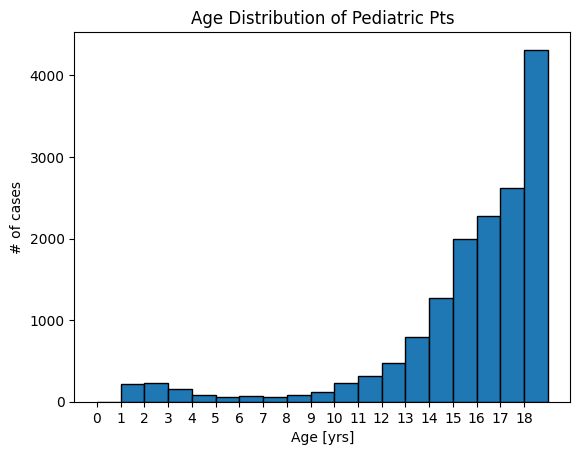

In [9]:
plt.hist(df['age'], bins=19, range=(0,19), align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Pediatric Pts')
plt.xticks(range(0,19,1))

## Age (adult cases)

In [10]:
display(df[df['age.group'] == 'adult'].loc[:, ~df.columns.isin(emer_list)].describe())
display(df[df['age.group'] == 'adult'][emer_list].sum())

,doy,age
count,173436.000000,173436.000000
mean,688.909696,52.039069
std,378.542513,23.720010
min,1.000000,18.000000
25%,366.000000,31.100000
50%,710.000000,48.100000
75%,1019.000000,72.100000
max,1308.000000,115.200000


medical.team.death                      51514.0
medical.team.restless.patient            6495.0
medical.team.psychiatric.disturbance    17107.0
medical.team.psychosis                   6314.0
medical.team.suicidal.attempt           10763.0
medical.team.anxiety                    38366.0
medical.team.suicidal.ideations          6645.0
medical.team.overdose.alcohol           27796.0
medical.team.overdose.drug               7804.0
medical.team.overdose.medication        11874.0
medical.team.hanging                      519.0
dtype: float64

([<matplotlib.axis.XTick at 0x22ba72557b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

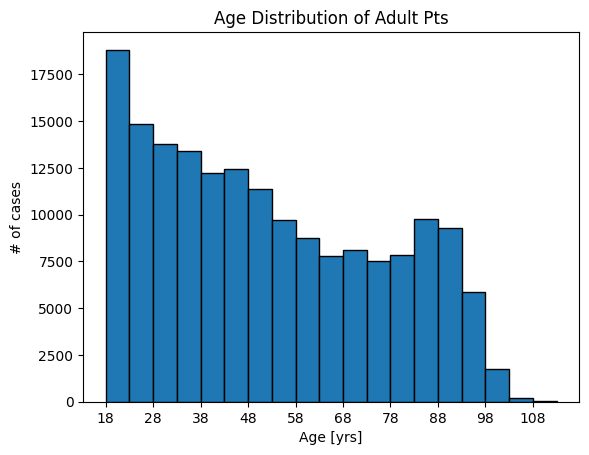

In [11]:
plt.hist(df['age'], bins=range(18,118,5), log=False, align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Adult Pts')
plt.xticks(range(18,118,10))

## All patients

([<matplotlib.axis.XTick at 0x22ba53c8130>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

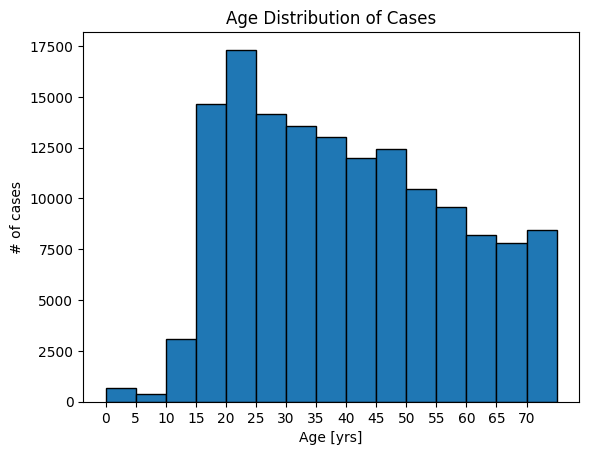

In [12]:
plt.hist(df['age'], bins=age_bins, log=False, align='mid', edgecolor='black')
plt.xlabel('Age [yrs]')
plt.ylabel('# of cases')
plt.title('Age Distribution of Cases')
plt.xticks(range(0,75,5))

## Sex

count     184481
unique         3
top         male
freq       97384
Name: sex, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
sex,,,,,,,,,,,
female,24820.0,2633.0,7232.0,2866.0,6570.0,26690.0,3174.0,8245.0,1898.0,7305.0,84.0
male,27117.0,4402.0,10508.0,3861.0,5171.0,14703.0,3802.0,22327.0,6114.0,5737.0,449.0
other,83.0,74.0,70.0,35.0,46.0,571.0,26.0,219.0,79.0,70.0,1.0


<AxesSubplot:>

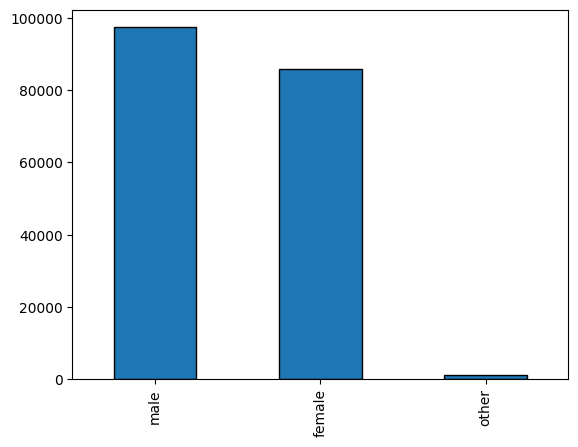

In [13]:
display(df['sex'].describe())
display(df.groupby('sex')[emer_list].sum())
df['sex'].value_counts().plot(kind = 'bar', edgecolor='black')

## Priority

count     184481
unique         3
top          als
freq       92245
Name: urgency, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
urgency,,,,,,,,,,,
als,50823.0,4264.0,3966.0,3436.0,3063.0,15667.0,859.0,6070.0,3820.0,4451.0,515.0
non-urgent bls,358.0,636.0,6681.0,985.0,551.0,6355.0,1663.0,1544.0,381.0,541.0,3.0
urgent - bls,839.0,2209.0,7163.0,2341.0,8173.0,19942.0,4480.0,23177.0,3890.0,8120.0,16.0


<AxesSubplot:>

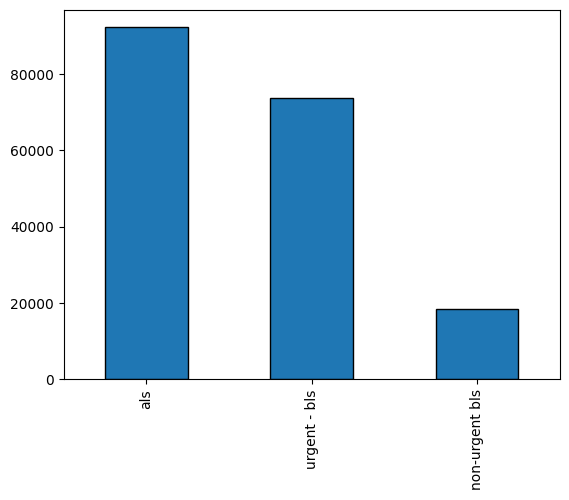

In [14]:
display(df['urgency'].describe())
display(df.groupby('urgency')[emer_list].sum())
df['urgency'].value_counts().plot(kind = 'bar', edgecolor='black')

## Responding vehicle

count     184481
unique         2
top          bls
freq       92691
Name: vehicle, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
vehicle,,,,,,,,,,,
als,50440.0,4081.0,4075.0,3215.0,3582.0,13736.0,1206.0,7231.0,3703.0,4997.0,497.0
bls,1580.0,3028.0,13735.0,3547.0,8205.0,28228.0,5796.0,23560.0,4388.0,8115.0,37.0


<AxesSubplot:>

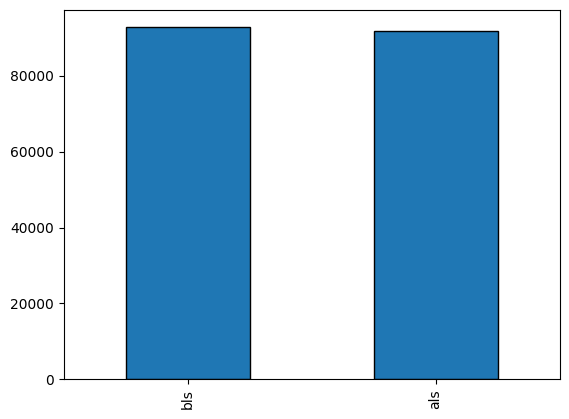

In [15]:
display(df['vehicle'].describe())
display(df.groupby('vehicle')[emer_list].sum())
df['vehicle'].value_counts().plot(kind = 'bar', edgecolor='black')

## Wave

In [16]:
display(df['wave'].describe())
display(df.groupby('wave')[emer_list].sum().loc[waves])

count        184481
unique           12
top       pre-covid
freq          57027
Name: wave, dtype: object

,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging
wave,,,,,,,,,,,
pre-covid,16133.0,2136.0,5130.0,1991.0,3527.0,12076.0,1955.0,10762.0,2772.0,4198.0,177.0
w1,1870.0,268.0,666.0,246.0,354.0,1447.0,220.0,671.0,237.0,363.0,10.0
b1-2,2228.0,300.0,796.0,277.0,534.0,1764.0,316.0,1244.0,309.0,612.0,30.0
w2,4743.0,666.0,1613.0,635.0,1086.0,3698.0,633.0,2282.0,738.0,1149.0,49.0
b2-3,1143.0,165.0,353.0,148.0,264.0,807.0,154.0,534.0,145.0,270.0,22.0
w3,5116.0,721.0,1499.0,593.0,942.0,3490.0,616.0,2179.0,645.0,1061.0,36.0
b3-4,4613.0,728.0,1803.0,755.0,1274.0,4666.0,785.0,3535.0,901.0,1413.0,54.0
w4,3422.0,490.0,1339.0,465.0,902.0,3258.0,471.0,2161.0,565.0,991.0,36.0
b4-5,3355.0,433.0,1093.0,414.0,701.0,2778.0,450.0,1911.0,431.0,826.0,29.0


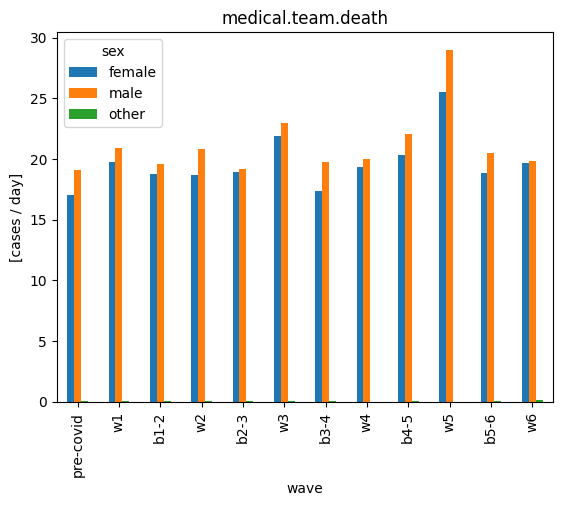

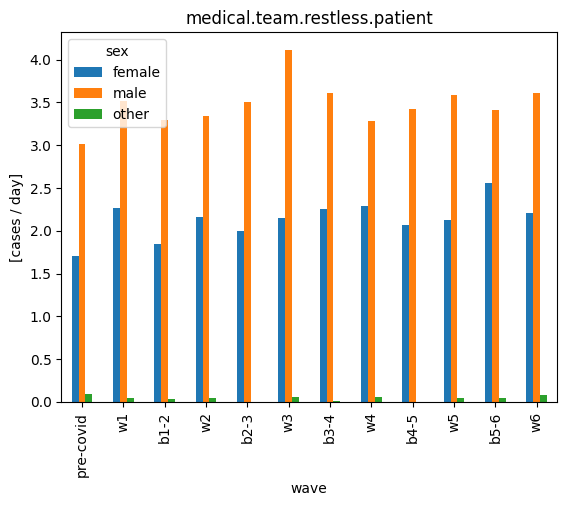

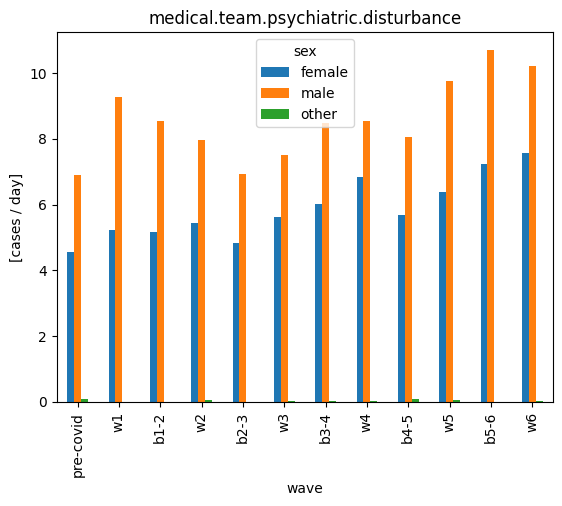

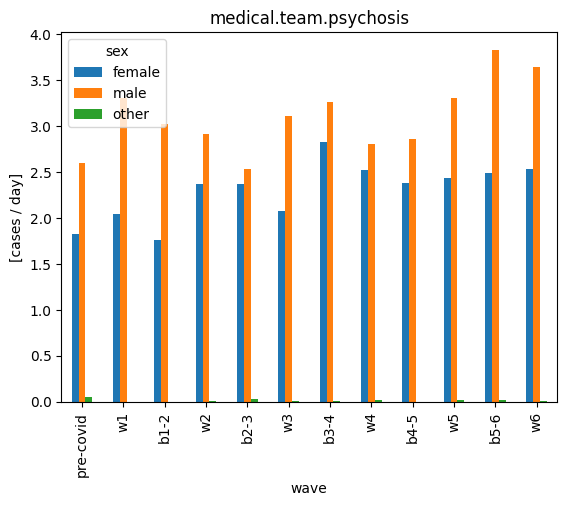

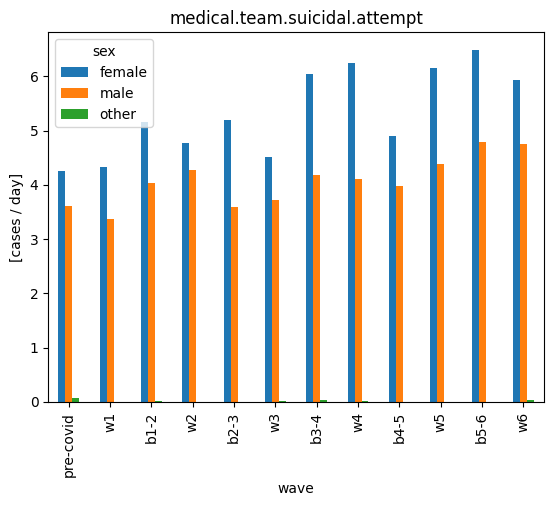

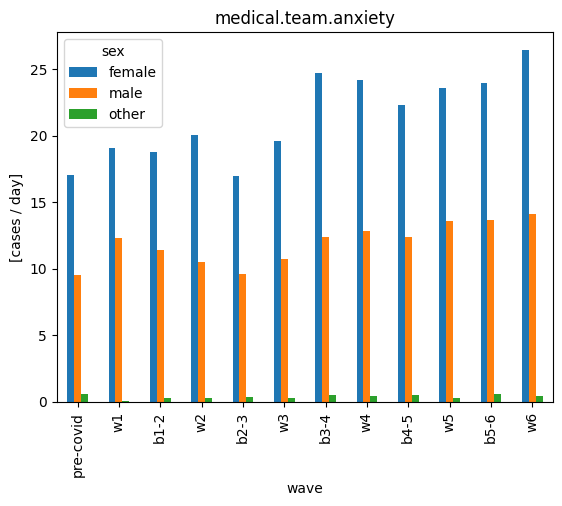

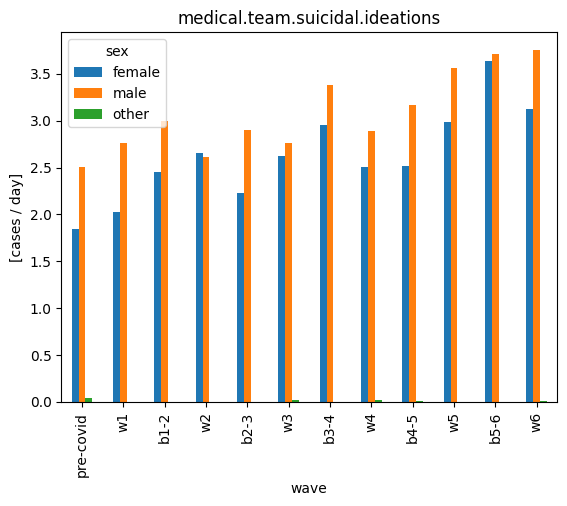

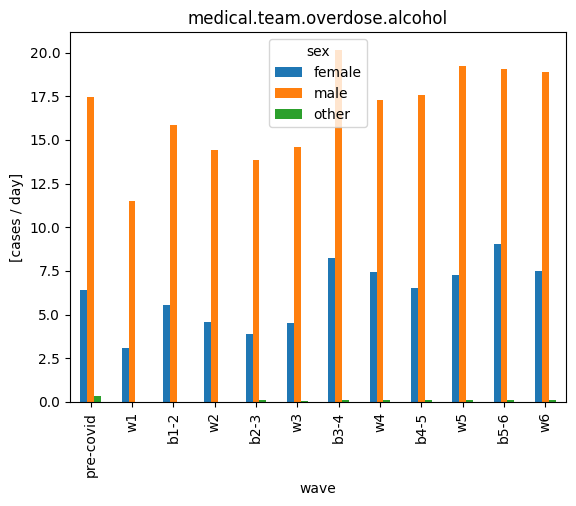

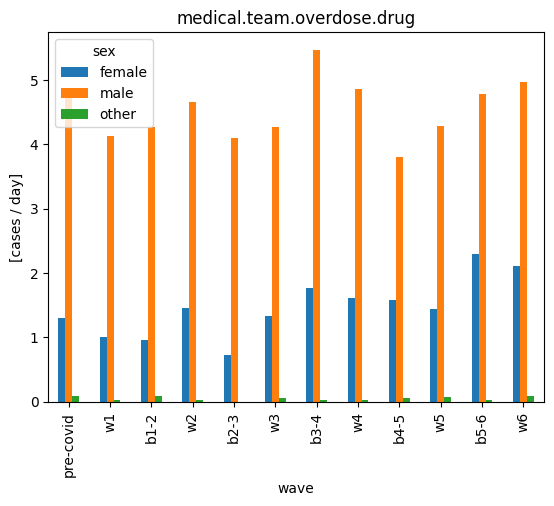

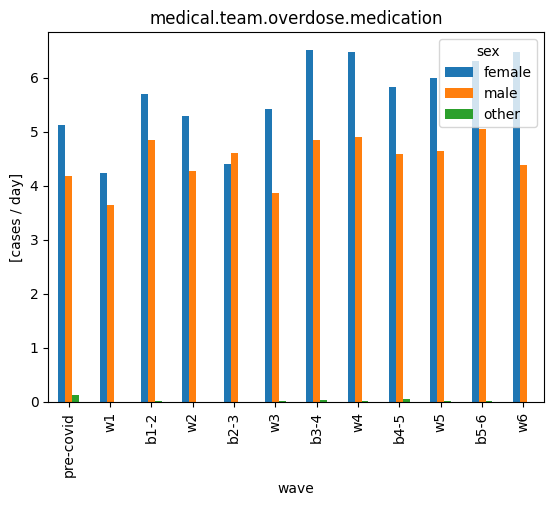

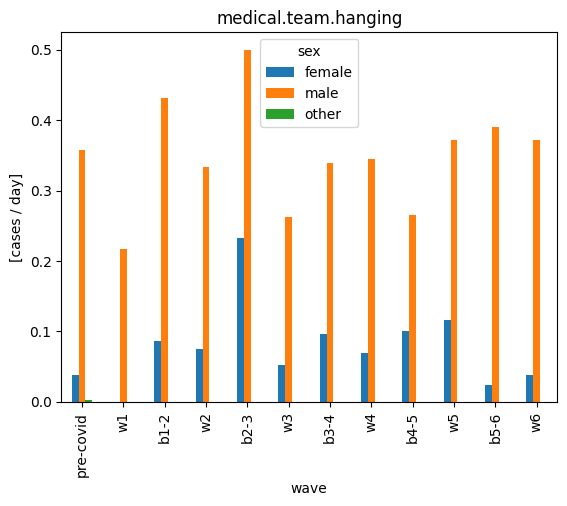

In [17]:
for emergency in emer_list:
    
    gb_df = df.groupby(['wave', 'sex'])[emergency].sum().reset_index()
    
    for wave in waves:
        gb_df.loc[gb_df['wave'] == wave, 'ndays'] = int(ndays.loc[wave]) # add period days
    
    gb_df['ratio'] = gb_df[emergency] / gb_df['ndays'] # Calculate ratio of cases per days in period

    pt_df = pd.pivot_table(gb_df, values="ratio", index='wave', columns='sex', aggfunc=np.sum).reindex(index = waves)  
    pt_df.plot.bar(title = emergency, ylabel = "[cases / day]")

## Cases

medical.team.death                      52020.0
medical.team.restless.patient            7109.0
medical.team.psychiatric.disturbance    17810.0
medical.team.psychosis                   6762.0
medical.team.suicidal.attempt           11787.0
medical.team.anxiety                    41964.0
medical.team.suicidal.ideations          7002.0
medical.team.overdose.alcohol           30791.0
medical.team.overdose.drug               8091.0
medical.team.overdose.medication        13112.0
medical.team.hanging                      534.0
dtype: float64

<AxesSubplot:>

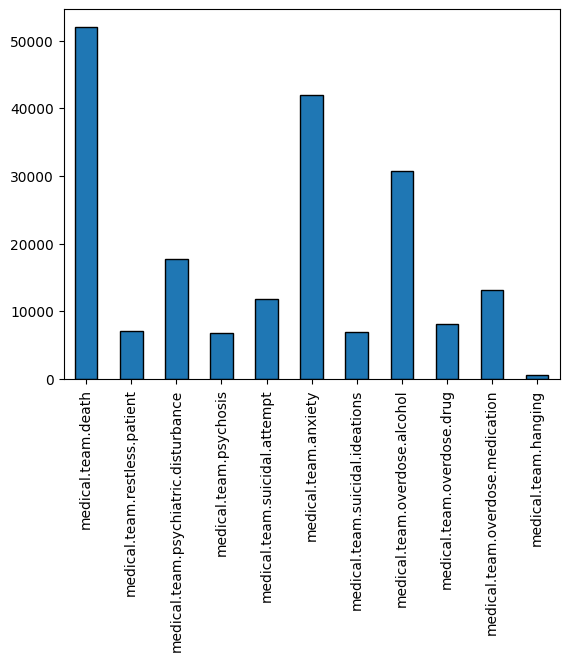

In [18]:
display(df[emer_list].sum())
df[emer_list].sum().plot(kind='bar', edgecolor='black')

Text(0.5, 1.0, "Number of cases normalized to Israel's population in 2017")

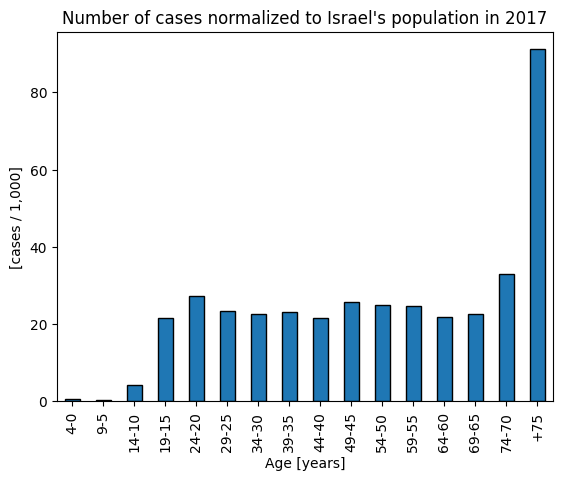

In [26]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,np.inf]
age_adj_1000 = pd.cut(df['age'], bins=bins).value_counts(sort=False)
age_adj_1000.index = pop_il_2017.T['total'].index
age_adj_1000 = (age_adj_1000.div(pop_il_2017.T['total'], axis=0))*1000
age_adj_1000.plot(kind='bar', edgecolor='black')
plt.xlabel('Age [years]')
plt.ylabel('[cases / 1,000]')
plt.title('Number of cases normalized to Israel\'s population in 2017')

## Cases w/o deaths

medical.team.restless.patient            7109.0
medical.team.psychiatric.disturbance    17810.0
medical.team.psychosis                   6762.0
medical.team.suicidal.attempt           11787.0
medical.team.anxiety                    41964.0
medical.team.suicidal.ideations          7002.0
medical.team.overdose.alcohol           30791.0
medical.team.overdose.drug               8091.0
medical.team.overdose.medication        13112.0
medical.team.hanging                      534.0
dtype: float64

<AxesSubplot:>

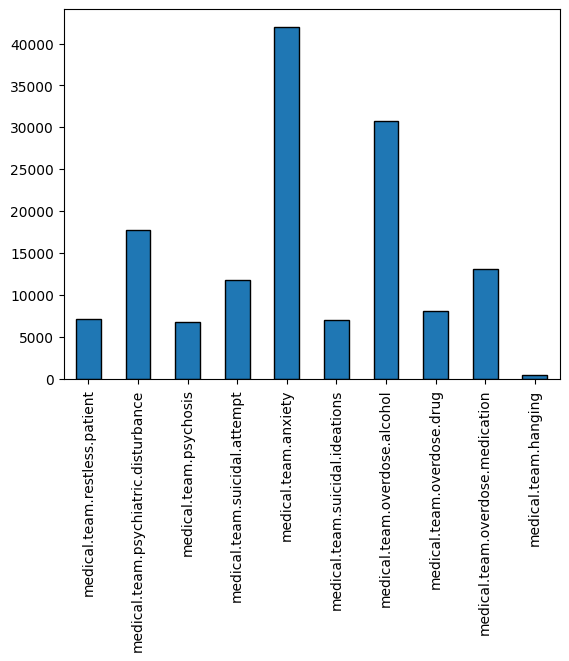

In [20]:
display(df[emer_list[1:len(emer_list)]].sum())
df[emer_list[1:len(emer_list)]].sum().plot(kind='bar', edgecolor='black')

## Cases of death

In [21]:
df_dead = df[df['medical.team.death'] == 1]
df_dead

,doy,wave,urgency,vehicle,medical.team.death,medical.team.restless.patient,medical.team.psychiatric.disturbance,medical.team.psychosis,medical.team.suicidal.attempt,medical.team.anxiety,medical.team.suicidal.ideations,medical.team.overdose.alcohol,medical.team.overdose.drug,medical.team.overdose.medication,medical.team.hanging,age,datetime,age.group,sex
93,1,pre-covid,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,2019-01-01 09:00:00,adult,female
97,1,pre-covid,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.1,2019-01-01 05:00:00,adult,female
98,1,pre-covid,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,2019-01-01 10:00:00,adult,female
100,1,pre-covid,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.4,2019-01-01 15:00:00,adult,female
101,1,pre-covid,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,2019-01-01 13:00:00,adult,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196020,1308,w6,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.4,2022-07-31 13:00:00,adult,female
196024,1308,w6,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.1,2022-07-31 21:00:00,adult,female
196026,1308,w6,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.8,2022-07-31 17:00:00,adult,male
196045,1308,w6,als,als,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.1,2022-07-31 08:00:00,adult,male


Text(0.5, 1.0, 'Age distribution in cases of death')

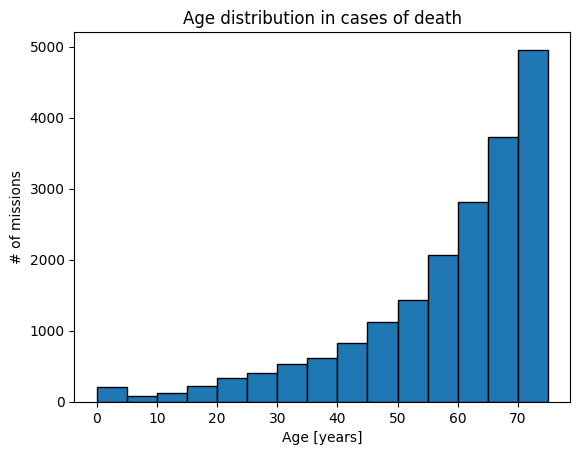

In [22]:
df_dead['age'].plot(kind = 'hist', bins=age_bins, edgecolor='black')
#plt.xticks(range(0,120,10))
plt.xlabel("Age [years]")
plt.ylabel("# of missions")
plt.title("Age distribution in cases of death")

# Bivariate analysis and visualization

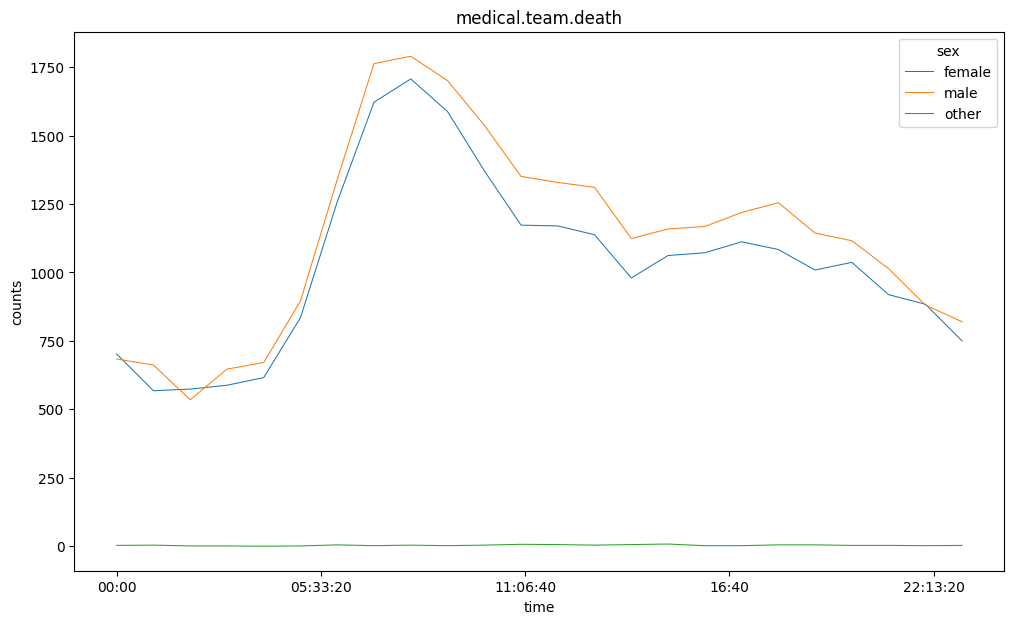

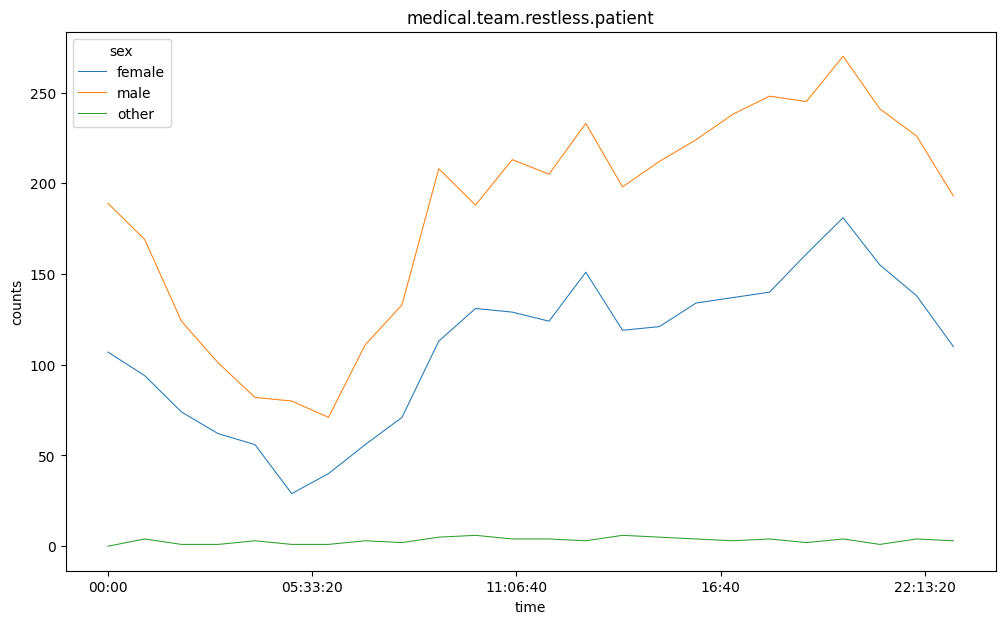

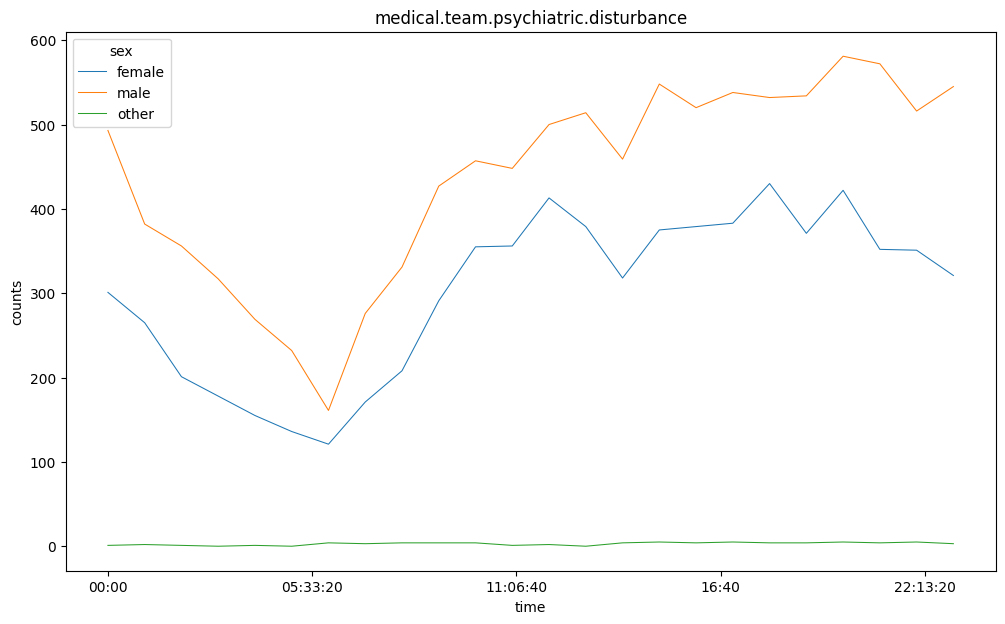

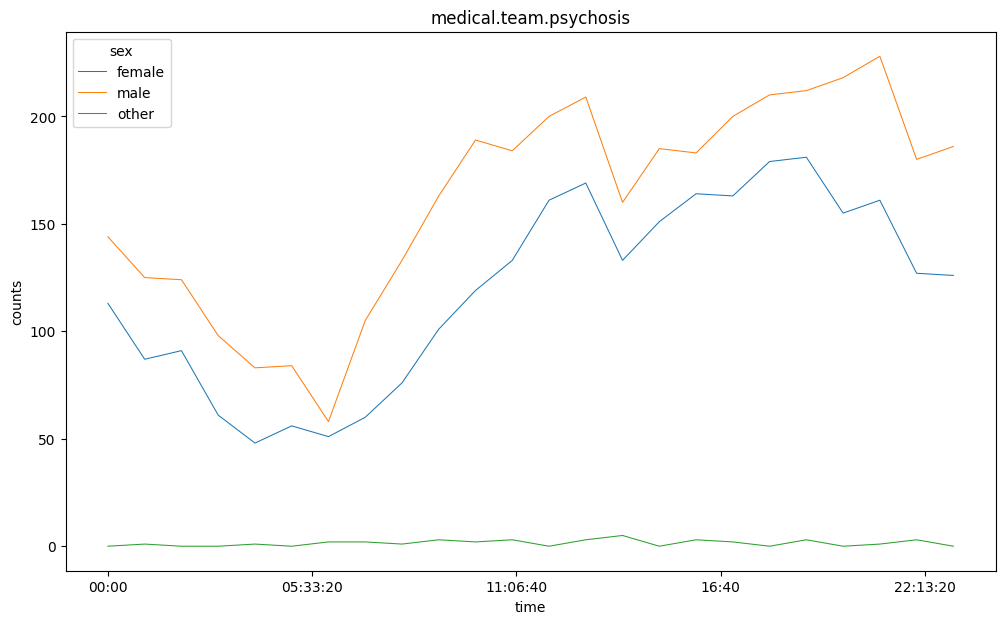

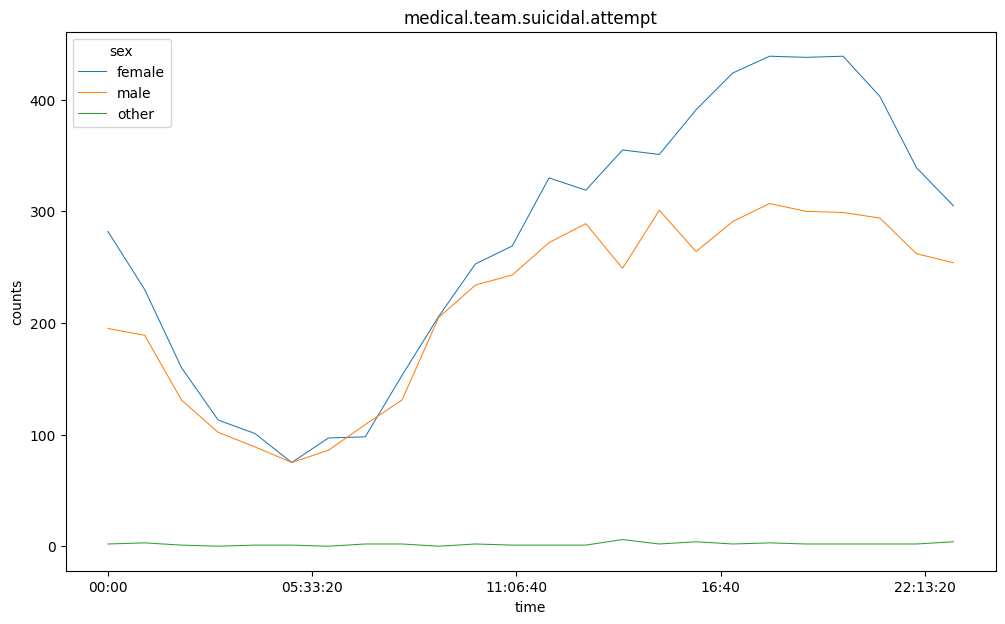

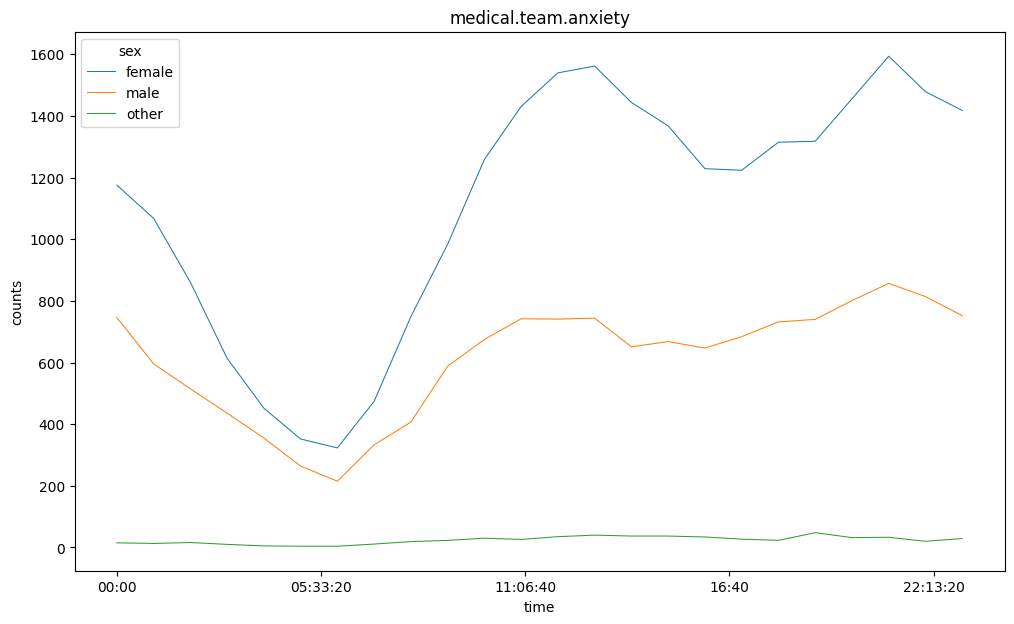

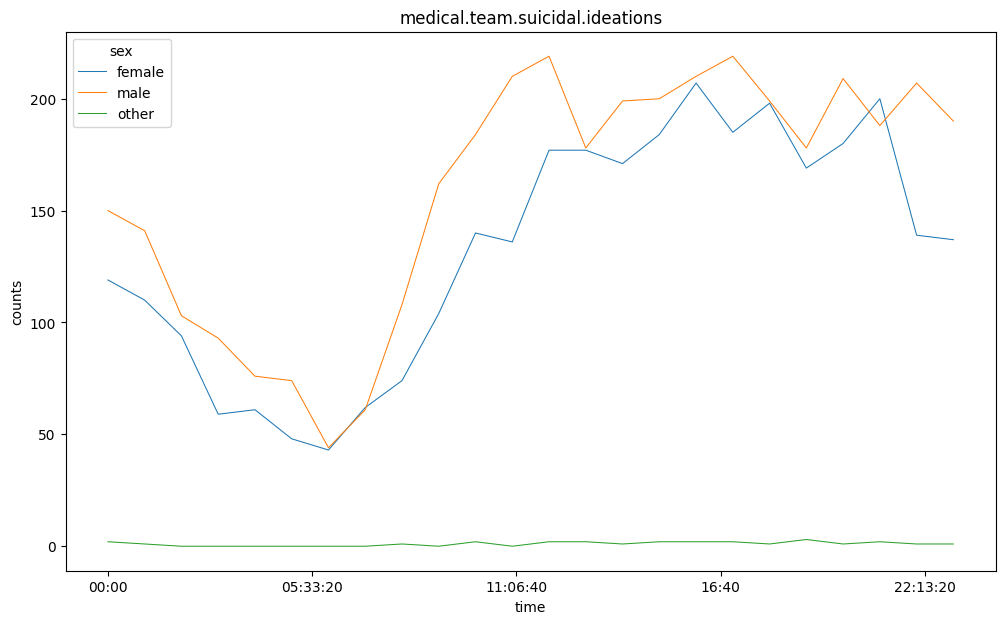

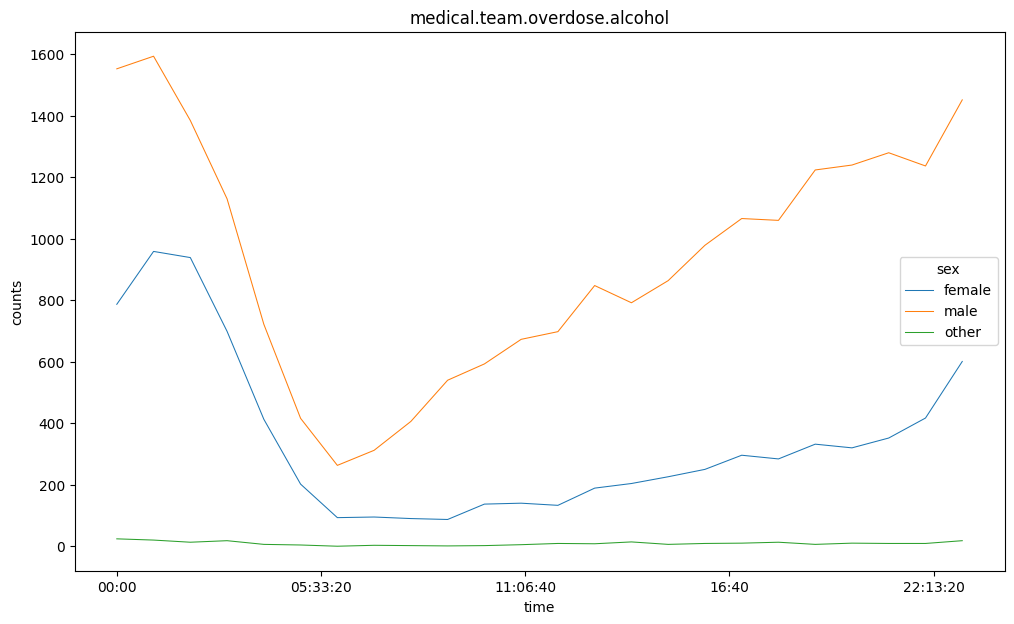

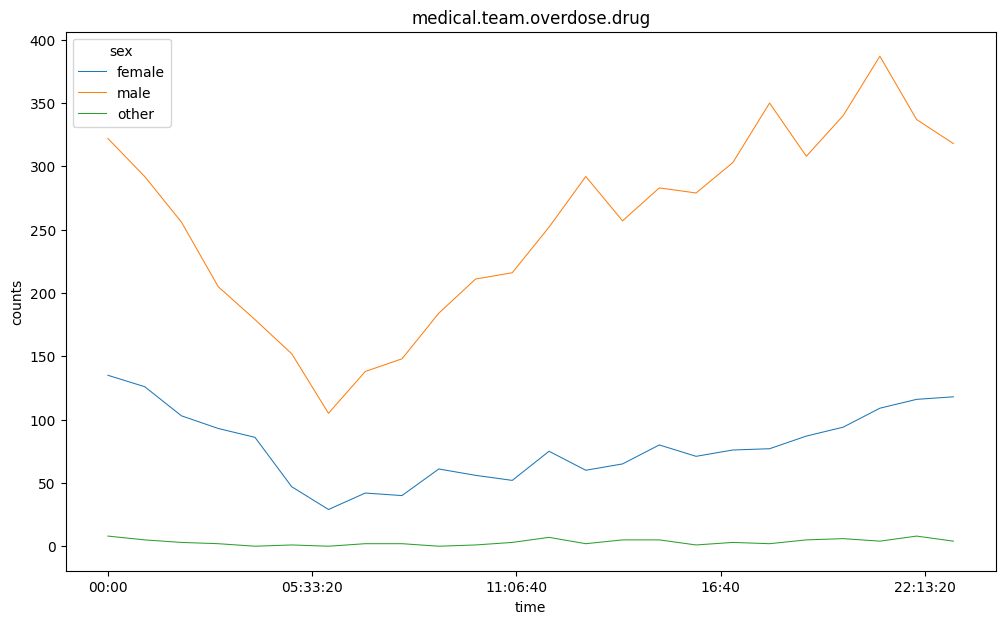

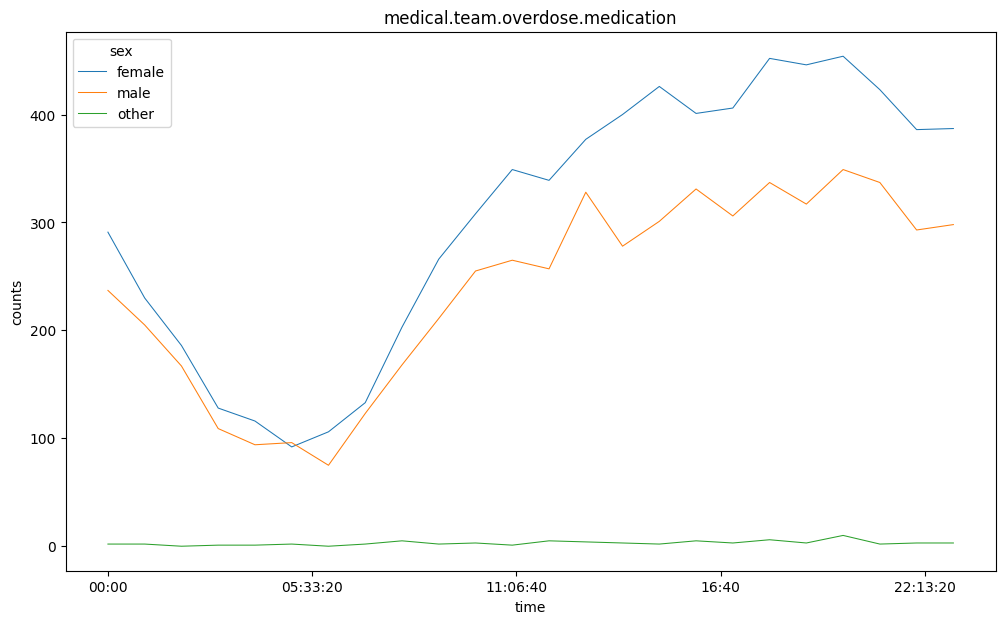

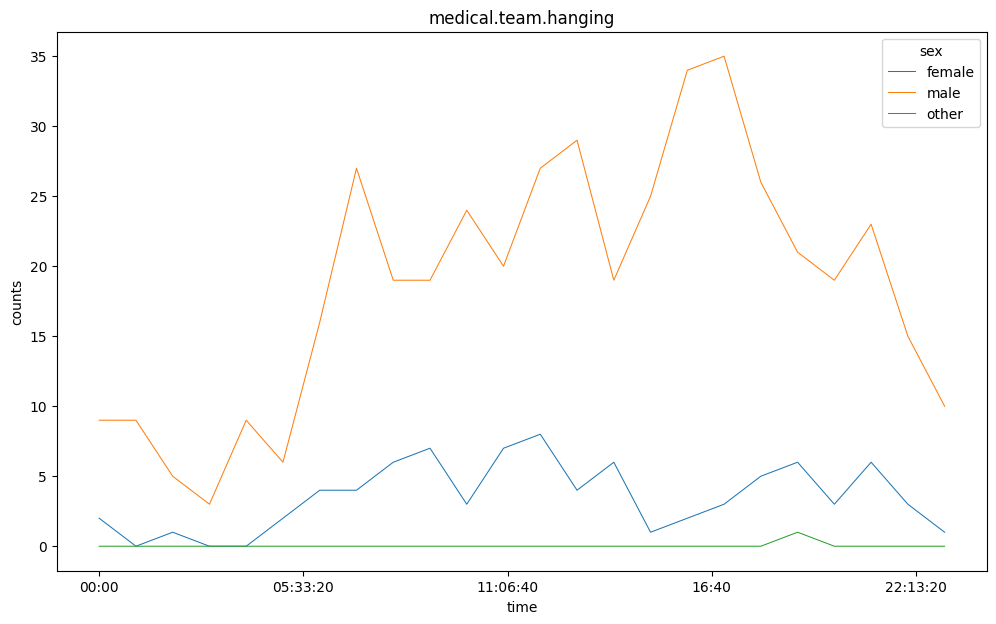

In [23]:
for emergency in emer_list:
    df1 = df[['datetime', 'sex', emergency]].copy()
    df1['time'] = df1['datetime'].apply(lambda x:x.time())
    pt_df = pd.pivot_table(df1, values=emergency, index='time', columns='sex', aggfunc=np.sum)
    pt_df.plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)

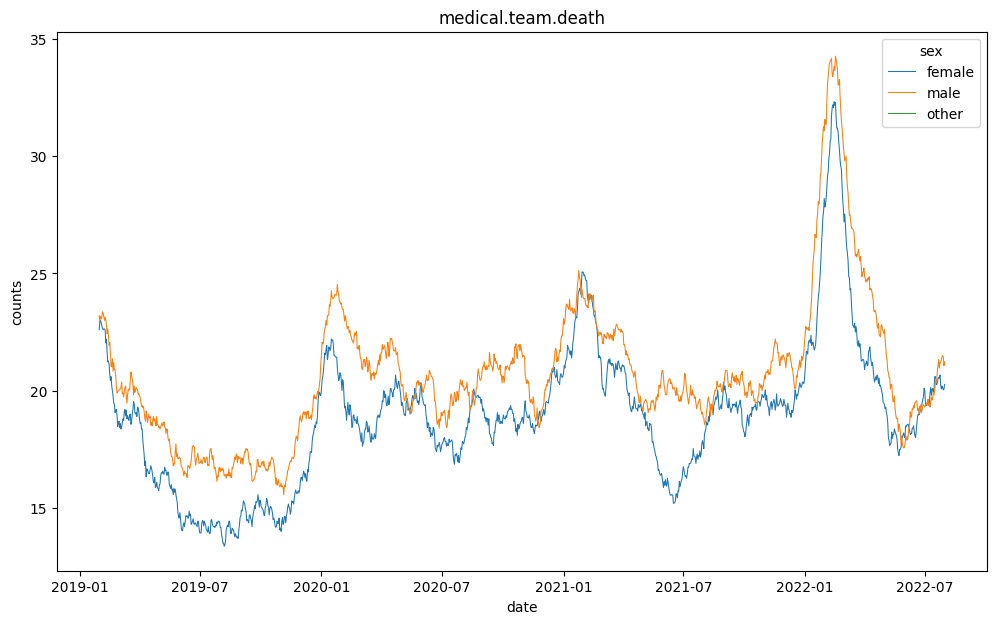

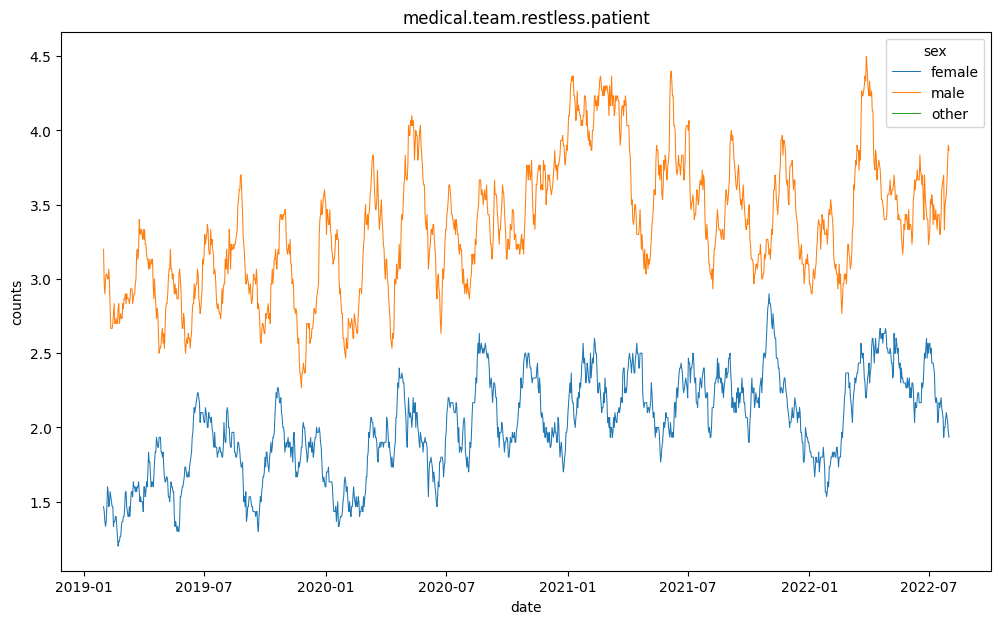

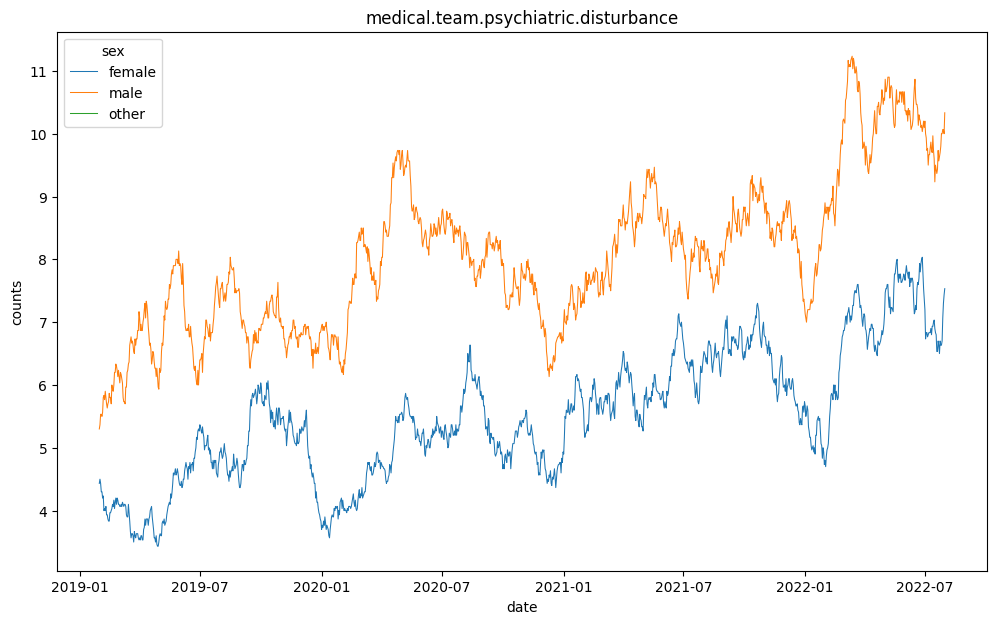

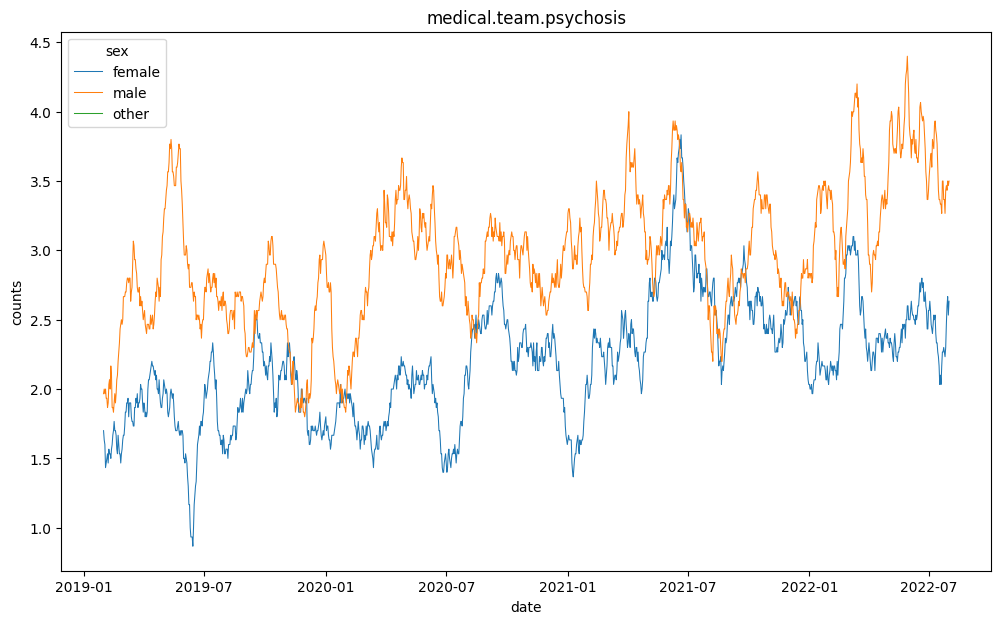

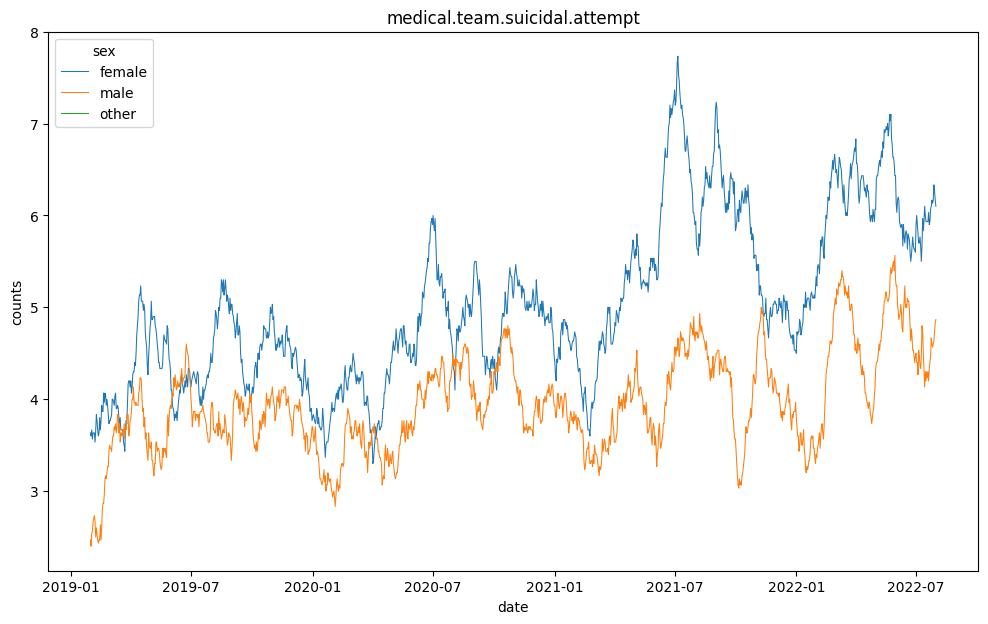

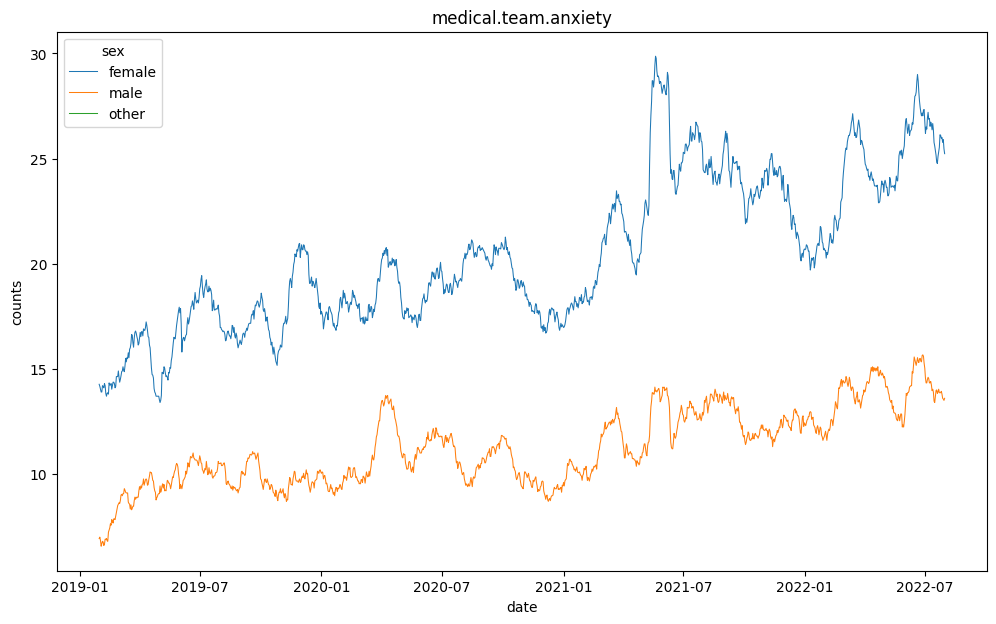

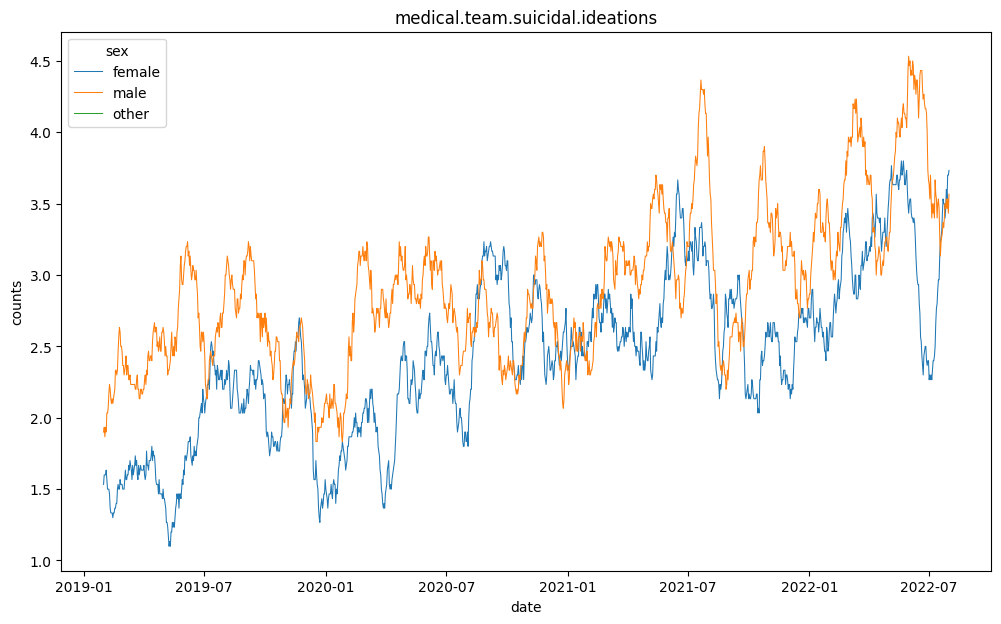

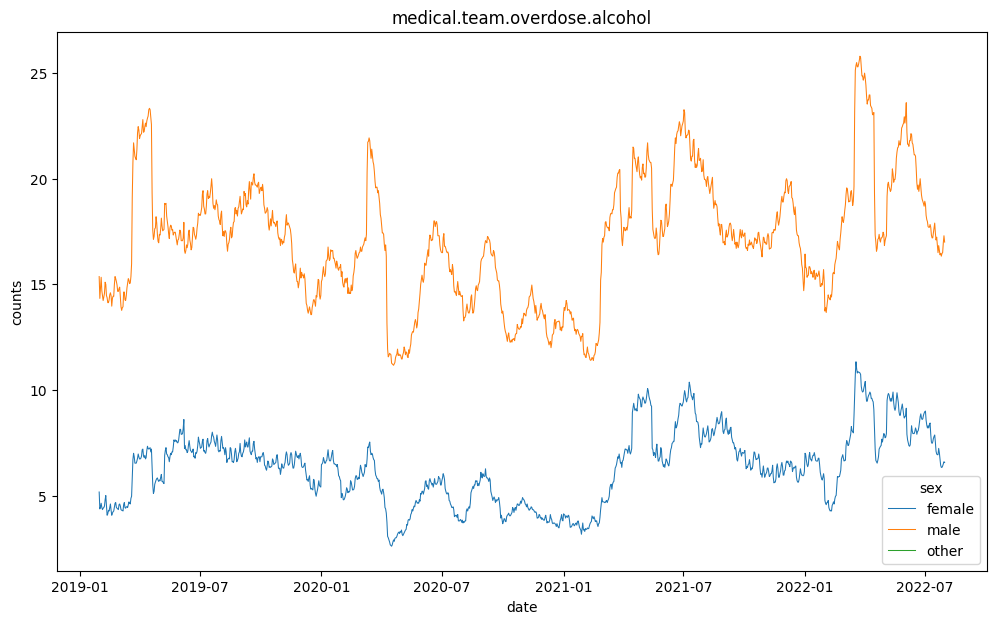

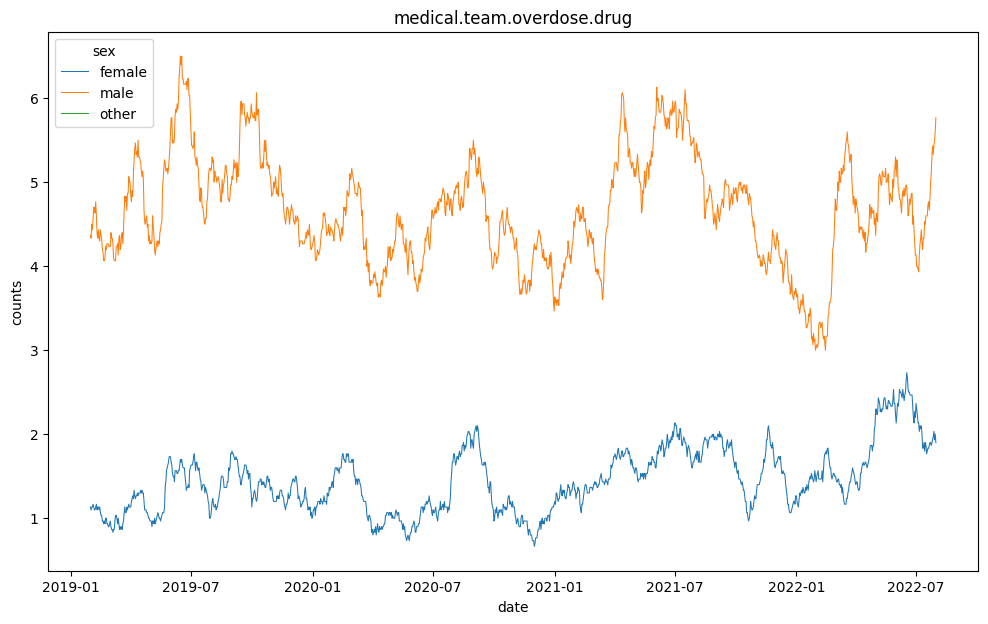

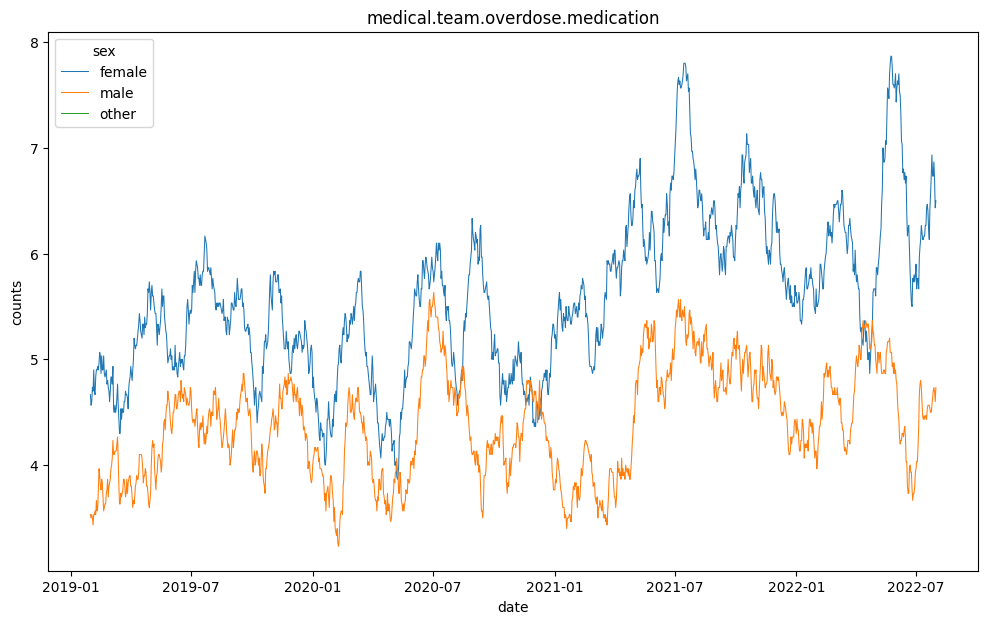

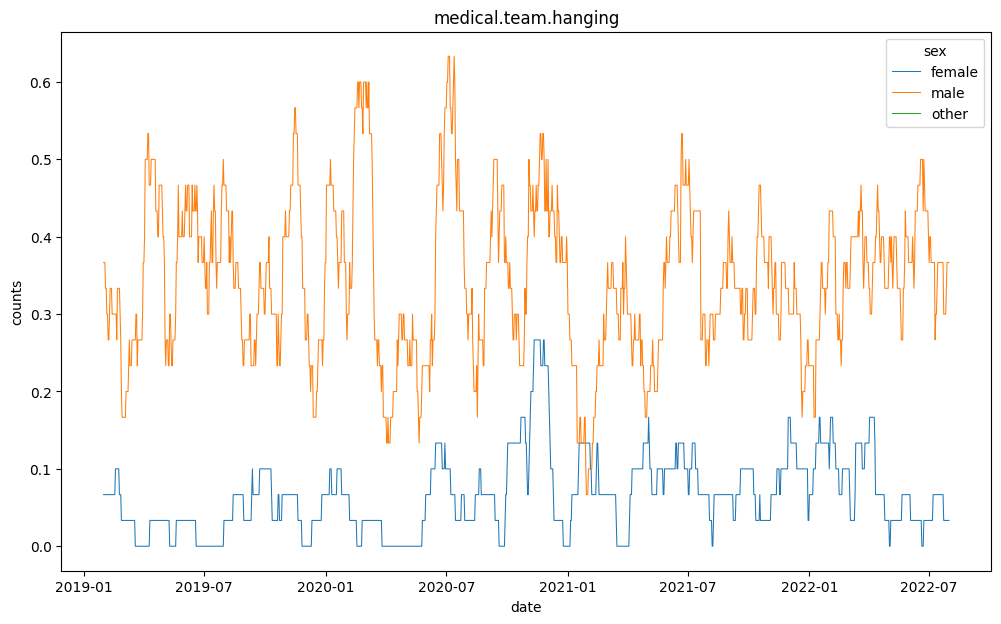

In [24]:
for emergency in emer_list:
    df1 = df[['datetime', 'sex', emergency]].copy()
    df1['date'] = df1['datetime'].apply(lambda x:x.date())
    pt_df = pd.pivot_table(df1, values=emergency, index='date', columns='sex', aggfunc=np.sum)
    pt_df.rolling(window=30).mean().plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)  

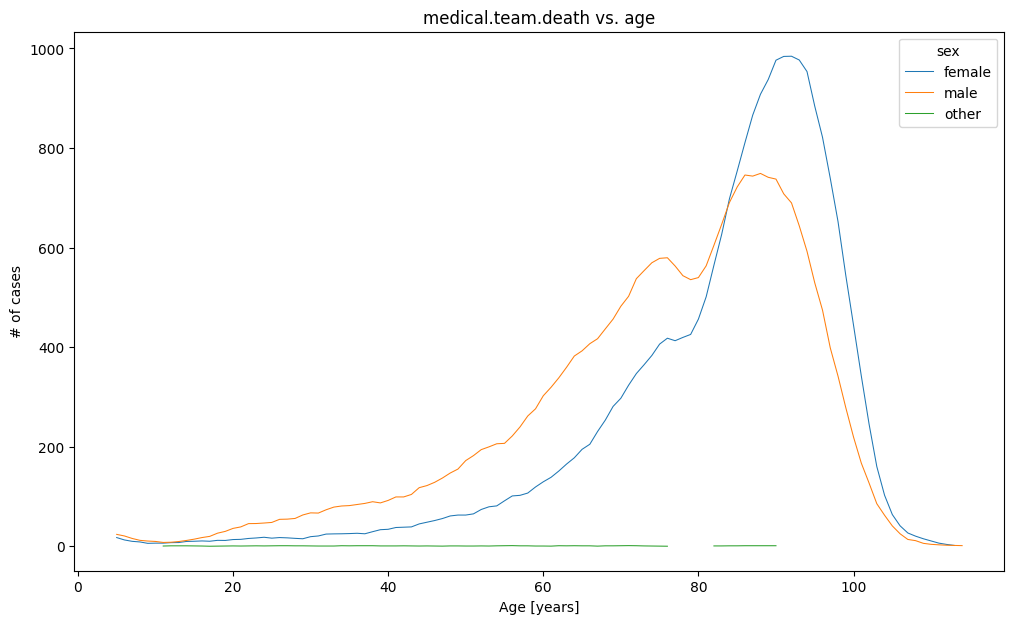

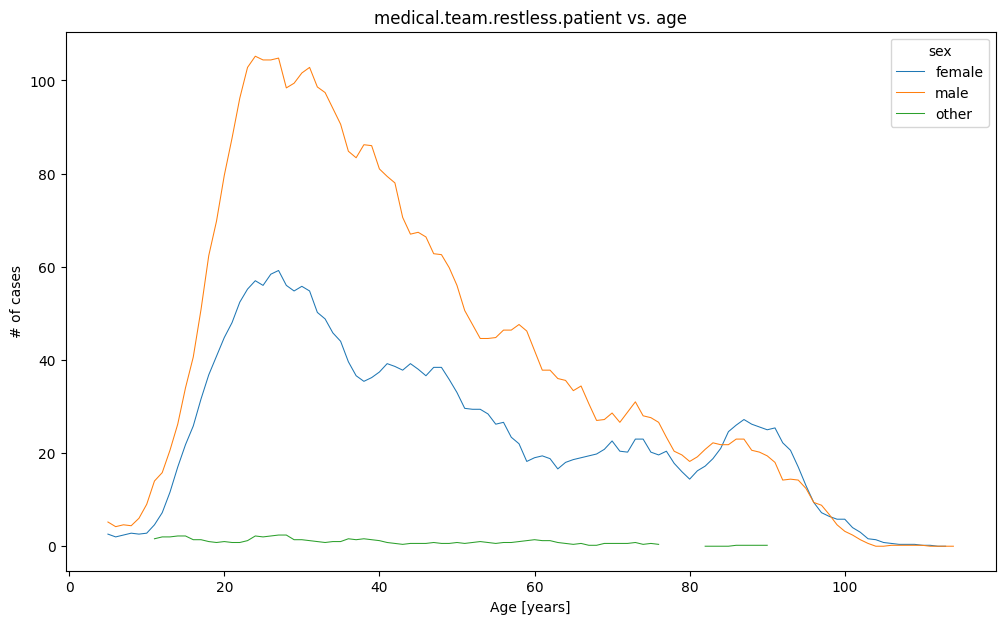

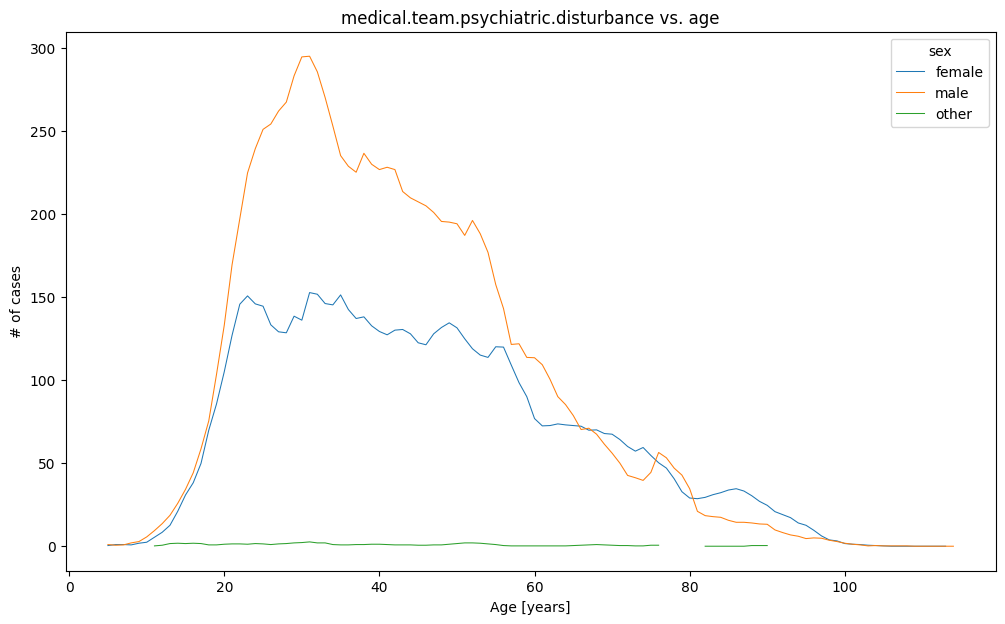

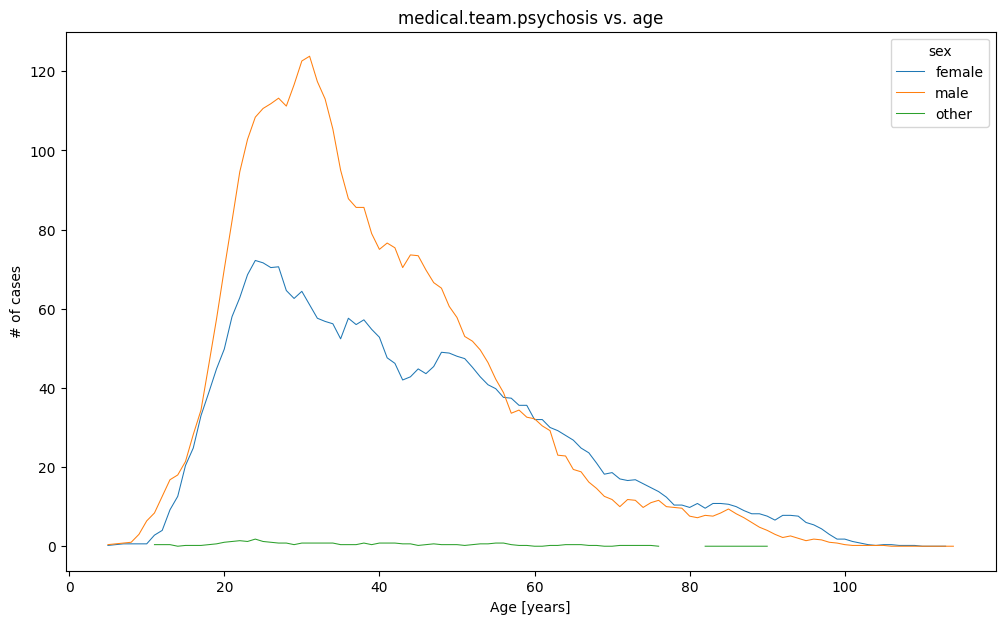

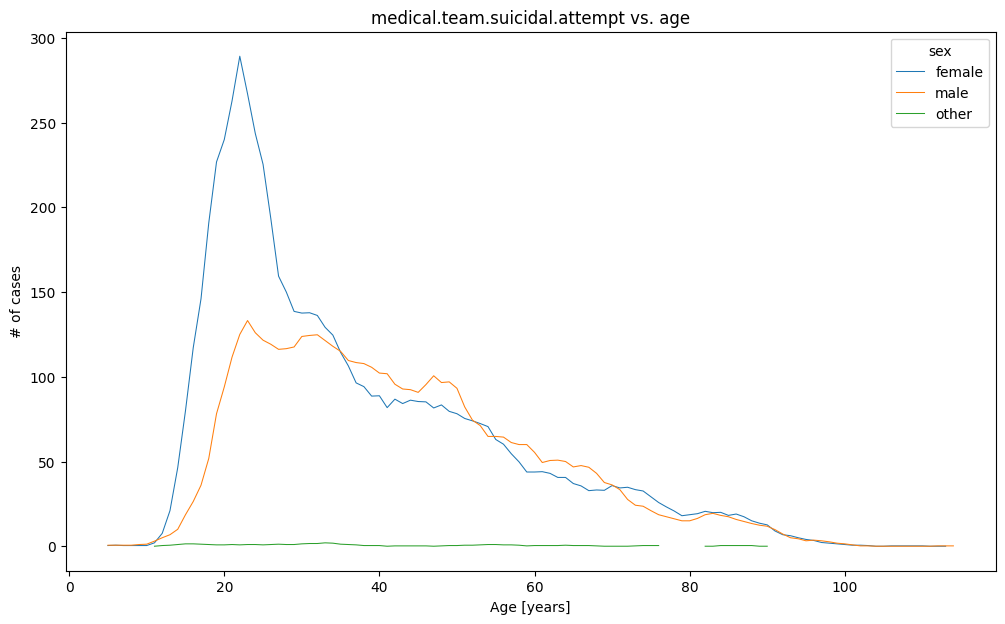

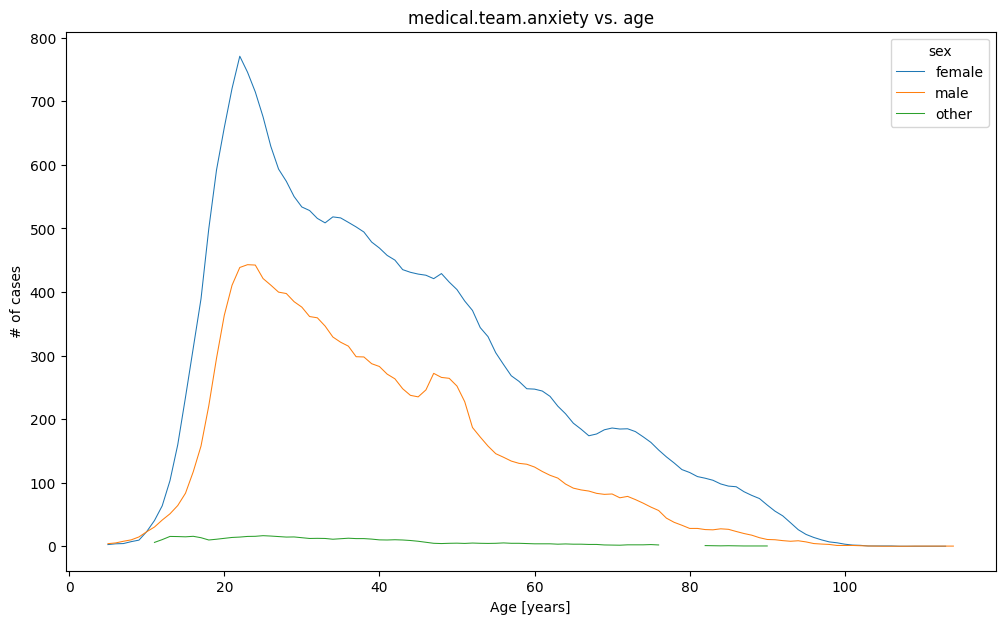

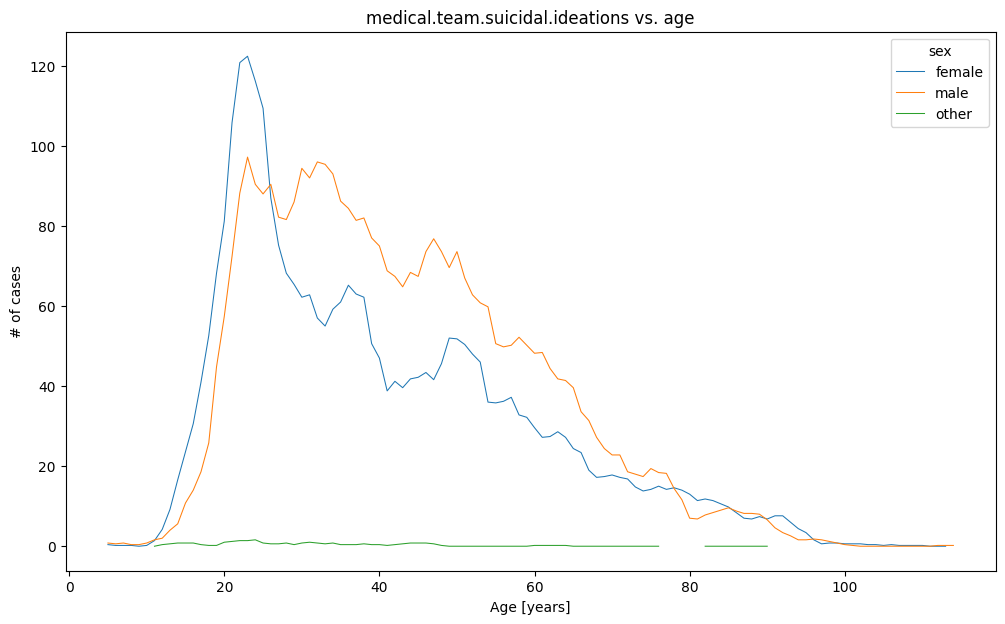

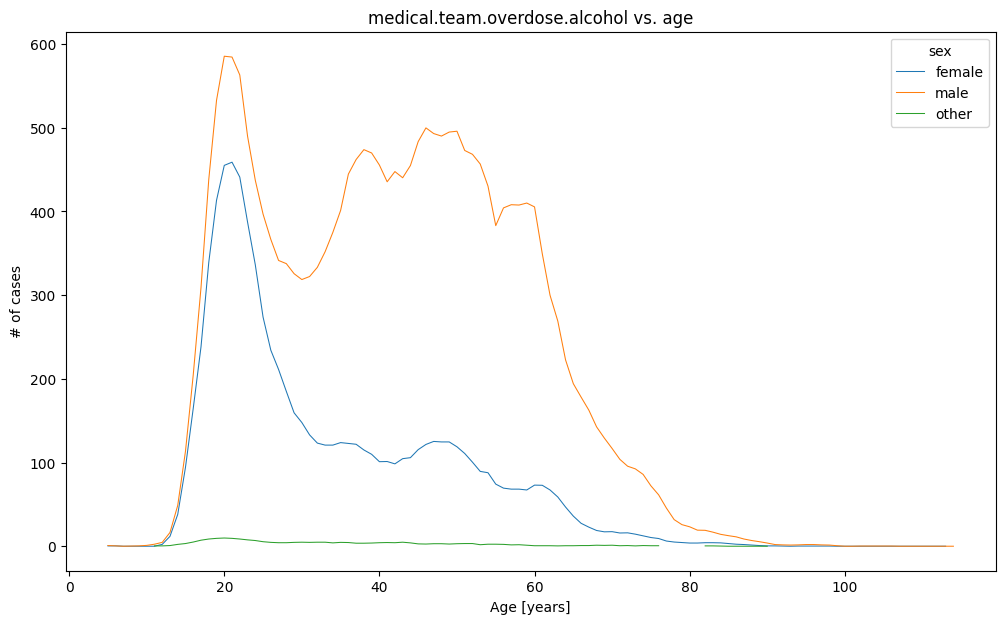

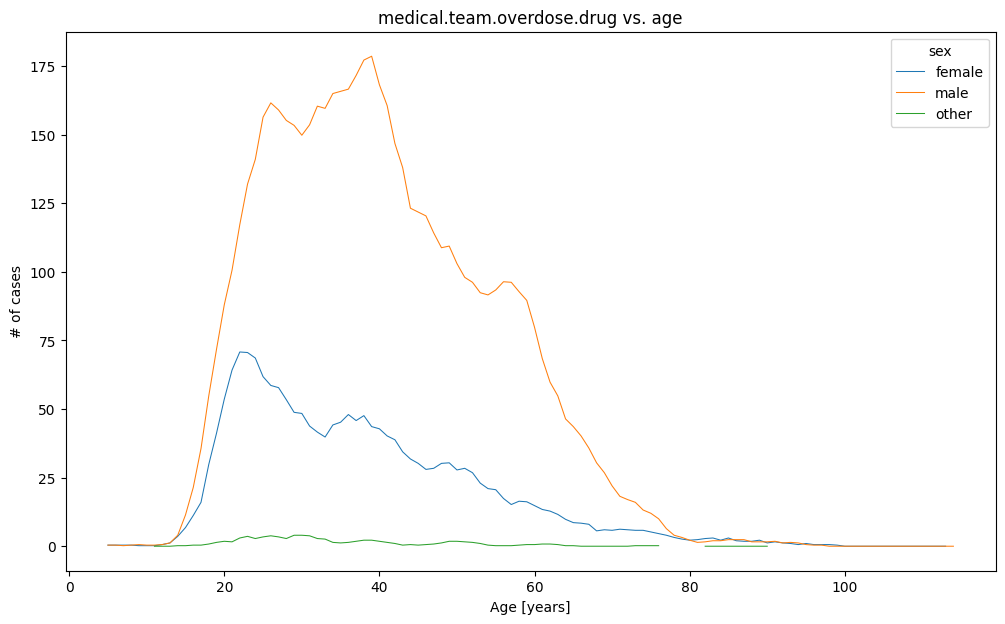

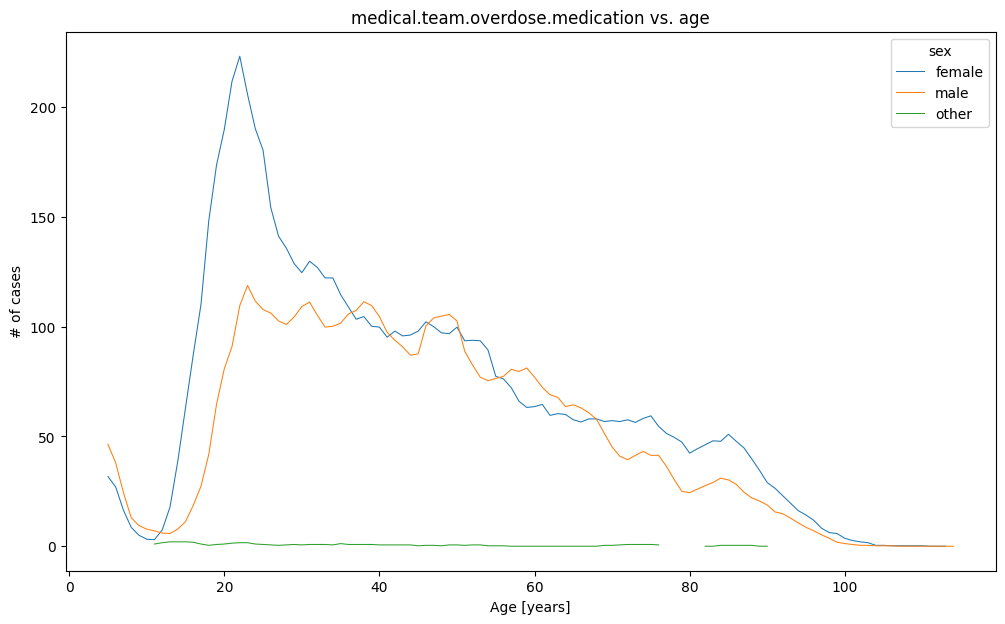

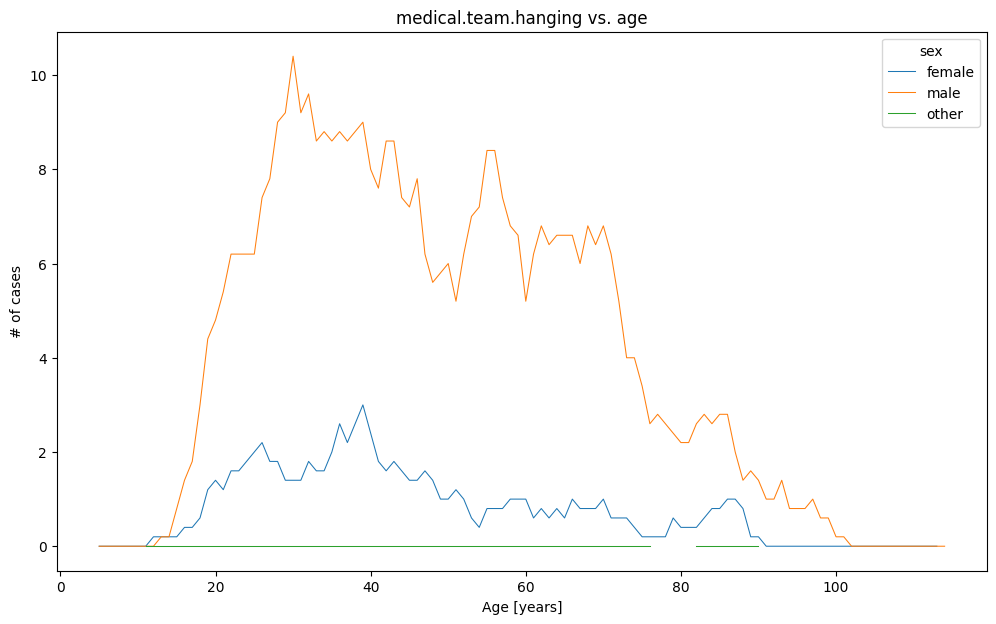

In [25]:
for emergency in emer_list:
    df1=df[['age', 'sex', emergency]].copy()
    df1['age']=round(df1['age'])
    #df1.groupby(['age']).count().plot(linewidth=0.75, figsize=(12,7))          
    pt_df = pd.pivot_table(df1, values=emergency, index='age', columns='sex', aggfunc=np.sum)
    #pt_df.plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)  
    pt_df.rolling(window=5).mean().plot(linewidth=0.75, figsize=(12,7), ylabel = 'counts', title=emergency)  
    plt.xlabel("Age [years]")
    plt.ylabel('# of cases')
    plt.title(emergency + ' vs. age')

In [ ]:
df.plot(kind='scatter', y='age', x='doy', figsize=(12,7), title='Age vs. day index', s=0.1)
#df1 = df[['datetime', 'age', emergency]].copy()
#df1['date'] = df1['datetime'].dt.date
#print(type(df1['date'][1]))
#df1
#sns.kdeplot(data=df0, x="date", y="age", figsize=(12,7)) #, hue="kind")
# Play aound with plotting options untill I can draw a conclusion from the data

# Conclusions

1. Most of the pediatric patients are in their late teens while most of the adult ones are in the 20-30.
2. Most of the calls are prioritized as ALS calls followed by BLS-urgent. BLS is the least frequent priority.
3. There are no major differences in the responding unit type.
4. There is an unusual spike in the amount of deaths per day around the fifth wave period.
5. Male patients tend suffer more from out of hospital death, restlessness, general psychiatric disturbance, psychosis, suicidal ideation, alcohol and drug overdose and hangind. Females are more prone to suicidal attempts, anxiety and medication overdose.
6. Other then out of hospital death, anxiety is the most frequent call closely followed by alcohol overdose.
7. Most of our patients are male (just over a half).